### AIMS AND OBJECTIVES

Here, we wish to analyse people killed by police officers in the United States of America from 2015-2020.

### DATA DESCRIPTION

Name:victims name
<br>Date:Date the event occured
<br>Manner of death:How the victim was killed
<br>Armed:Whether or not the victim was armed
<br>Age:Age of the victim
<br>Gender:Gender of the victim
<br>Race:Race of the victim
<br>City:The city where the victim was killed
<br>State:State 
<br>Signs of mental illness: Whether or not the victim had any signs of mental illness
<br>Threat level:Whether or not the police was of any threat from the victim
<br>Flee:Whether or not the victim was fleeing
<br>Body camera: If the event was caught on body cam or not

In [3]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the data
data=pd.read_csv("shootings.csv")
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [5]:
data.shape

(4895, 15)

In [6]:
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [7]:
data["gender"].unique()

array(['M', 'F'], dtype=object)

In [8]:
data["age"].min(),data["age"].max()

(6.0, 91.0)

In [9]:
data["race"].unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [10]:
data["race"].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

More whites have been killed by police brutality than blacks

In [11]:
data["agecheck"]=data["age"].astype(str)

In [12]:
data["agecheck"]=data["agecheck"].apply(lambda x: x.split("."))

In [13]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,agecheck
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,"[53, 0]"
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,"[47, 0]"
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,"[23, 0]"
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,"[32, 0]"
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,"[39, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,"[27, 0]"
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,"[23, 0]"
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,"[25, 0]"
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,"[22, 0]"


In [14]:
data["agecheckproof"]=data["agecheck"].apply(lambda x :"True" if len(x)>2 else "False")

In [15]:
data["agecheckproof"].unique()

array(['False'], dtype=object)

We see that age does not have any one decimal place number(it is clean), so we can remove it

In [16]:
data.drop(["agecheck","agecheckproof"],axis="columns",inplace=True)

In [17]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [18]:
data.drop("id",axis="columns",inplace=True)

In [19]:
data["date"]=pd.to_datetime(data["date"])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     4895 non-null   object        
 1   date                     4895 non-null   datetime64[ns]
 2   manner_of_death          4895 non-null   object        
 3   armed                    4895 non-null   object        
 4   age                      4895 non-null   float64       
 5   gender                   4895 non-null   object        
 6   race                     4895 non-null   object        
 7   city                     4895 non-null   object        
 8   state                    4895 non-null   object        
 9   signs_of_mental_illness  4895 non-null   bool          
 10  threat_level             4895 non-null   object        
 11  flee                     4895 non-null   object        
 12  body_camera              4895 non-

In [21]:
data.set_index("date",inplace=True)

In [22]:
data.index.min()

Timestamp('2015-01-02 00:00:00')

The minimum year is 2015

In [23]:
data.index.max()

Timestamp('2020-06-15 00:00:00')

In [24]:
data.loc["2020-06-15"]

name                       Nicholas Hirsh
manner_of_death                      shot
armed                                 gun
age                                    31
gender                                  M
race                                White
city                             Lawrence
state                                  KS
signs_of_mental_illness             False
threat_level                       attack
flee                                  Car
body_camera                         False
arms_category                        Guns
Name: 2020-06-15 00:00:00, dtype: object

In [25]:
data["year"]=data.index.year
data["month"]=data.index.month_name()


In [26]:
data

,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,,
2015-01-02,Tim Elliot,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,January
2015-01-02,Lewis Lee Lembke,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,January
2015-01-03,John Paul Quintero,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,January
2015-01-04,Matthew Hoffman,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,January
2015-01-04,Michael Rodriguez,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-12,Rayshard Brooks,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020,June
2020-06-12,Caine Van Pelt,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020,June
2020-06-13,Hannah Fizer,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020,June


In [27]:
data[data["year"]==2020]

,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,,
2020-01-01,Derrick A. Elseth,shot,gun,24.0,M,White,Richmond County,VA,False,other,Not fleeing,False,Guns,2020,January
2020-01-01,Gerardo Antonio Conchas-Bustas,shot,knife,20.0,M,Other,Denver,CO,False,attack,Not fleeing,True,Sharp objects,2020,January
2020-01-01,Gabriel Strickland,shot and Tasered,toy weapon,25.0,M,White,Grass Valley,CA,True,attack,Not fleeing,False,Other unusual objects,2020,January
2020-01-02,Jeffery Dale Millsap,shot,gun,26.0,M,White,Holt,MO,False,attack,Car,False,Guns,2020,January
2020-01-02,Jamari Daiwon Tarver,shot,vehicle,26.0,M,Black,North Las Vegas,NV,False,attack,Car,True,Vehicles,2020,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-12,Rayshard Brooks,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020,June
2020-06-12,Caine Van Pelt,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020,June
2020-06-13,Hannah Fizer,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020,June


In [28]:
data[data["name"].str.contains("Breonna")]

,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,,
2020-03-12,Breonna Taylor,shot,unarmed,26.0,F,Black,Louisville,KY,False,undetermined,Not fleeing,False,Unarmed,2020,March


Breonna Taylor killing is in the dataset, so we can say it is accurate and up-to-date

In [29]:
data.index.max()

Timestamp('2020-06-15 00:00:00')

In [30]:
data

,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,,
2015-01-02,Tim Elliot,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,January
2015-01-02,Lewis Lee Lembke,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,January
2015-01-03,John Paul Quintero,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,January
2015-01-04,Matthew Hoffman,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,January
2015-01-04,Michael Rodriguez,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-12,Rayshard Brooks,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020,June
2020-06-12,Caine Van Pelt,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020,June
2020-06-13,Hannah Fizer,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020,June


In [31]:
data.drop("state",axis="columns",inplace=True)

### MALE TO FEMALE KILLINGS

In [32]:
data["gender"].value_counts().loc["M"]/4895*100

95.46475995914199

In [33]:
data["gender"].value_counts().loc["F"]/4895*100

4.535240040858018

(array([4673.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         222.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

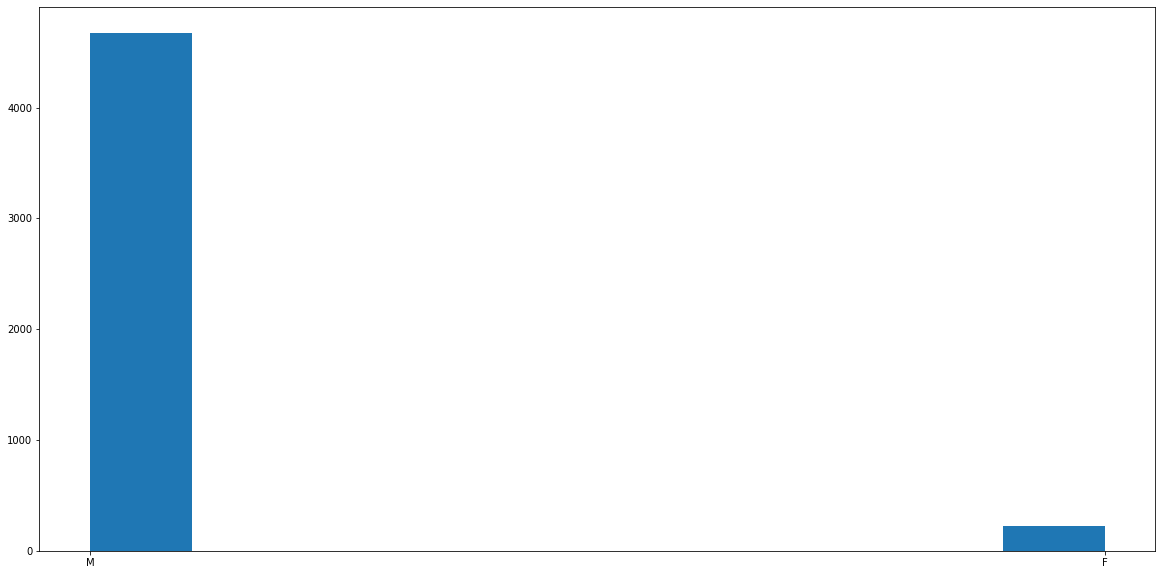

In [34]:
plt.figure(figsize=(20,10))
plt.hist(data["gender"])

Up to 95% of the people killed by police shootings were Male

And 4.53% of the people killed were Female

### PER YEAR

In [35]:
data["year"].value_counts()

2015    965
2017    906
2016    904
2018    888
2019    858
2020    374
Name: year, dtype: int64

(array([965.,   0., 904.,   0., 906.,   0., 888.,   0., 858., 374.]),
 array([2015. , 2015.5, 2016. , 2016.5, 2017. , 2017.5, 2018. , 2018.5,
        2019. , 2019.5, 2020. ]),
 <a list of 10 Patch objects>)

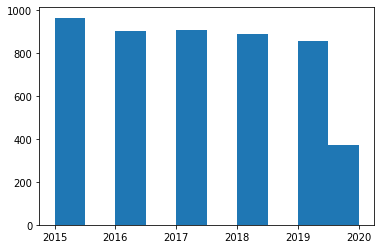

In [36]:
plt.hist(data["year"])

In [37]:
(data["year"].value_counts().loc[2015]/data.shape[0])*100

19.71399387129724

In [38]:
(data["year"].value_counts().loc[2016]/data.shape[0])*100

18.46782431052094

In [39]:
(data["year"].value_counts().loc[2017]/data.shape[0])*100

18.508682328907046

In [40]:
(data["year"].value_counts().loc[2018]/data.shape[0])*100

18.140960163432073

In [41]:
(data["year"].value_counts().loc[2019]/data.shape[0])*100

17.528089887640448

In [42]:
(data["year"].value_counts().loc[2020]/data.shape[0])*100

7.640449438202247

We see that for the past five years
<br>2015 has the most deaths from police shooting with 19.7%
<br>2017 has the second most deaths from police shooting with 18.50%
<br>2016 has the third deaths from police shooting with 18.46%
<br>2018 has  18.14% deaths from police shooting
<br>2019 has  17.52% deaths from police shooting
<br>2020 has  7.64% deaths from police shooting



### PER RACE

In [43]:
data["race"].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

(array([  93.,    0., 2476.,    0.,  902.,    0., 1298.,    0.,   48.,
          78.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

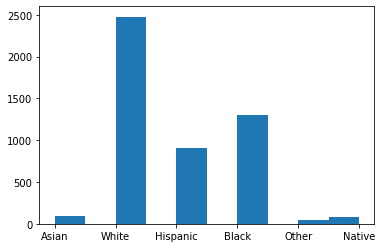

In [44]:
plt.hist(data["race"])

In [45]:
data["race"].value_counts().loc["White"]/data.shape[0]*100

50.582226762002044

In [46]:
data["race"].value_counts().loc["Black"]/data.shape[0]*100

26.516853932584272

51% of the deaths were whites while 27% were blacks

### CAUGHT ON BODY CAM

In [47]:
data["body_camera"].value_counts()

False    4317
True      578
Name: body_camera, dtype: int64

Most of the deaths were not caught on body cam

### PER MONTH

In [48]:
data["month"].value_counts()

January      505
March        503
February     462
April        430
May          418
July         413
June         399
August       371
October      367
November     354
December     345
September    328
Name: month, dtype: int64

(array([967., 503., 430., 418., 399., 413., 371., 328., 367., 699.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

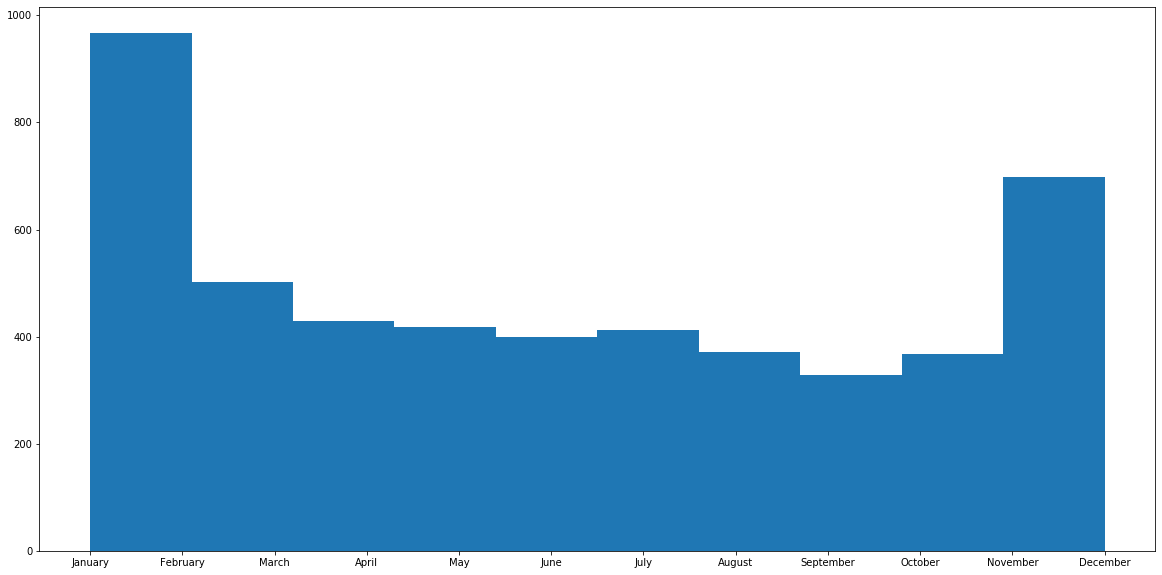

In [49]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(data.index.month_name())

Most of the deaths were recorded in January

### METHOD OF KILL

In [50]:
data

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-02,Tim Elliot,shot,gun,53.0,M,Asian,Shelton,True,attack,Not fleeing,False,Guns,2015,January
2015-01-02,Lewis Lee Lembke,shot,gun,47.0,M,White,Aloha,False,attack,Not fleeing,False,Guns,2015,January
2015-01-03,John Paul Quintero,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,False,other,Not fleeing,False,Unarmed,2015,January
2015-01-04,Matthew Hoffman,shot,toy weapon,32.0,M,White,San Francisco,True,attack,Not fleeing,False,Other unusual objects,2015,January
2015-01-04,Michael Rodriguez,shot,nail gun,39.0,M,Hispanic,Evans,False,attack,Not fleeing,False,Piercing objects,2015,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-12,Rayshard Brooks,shot,Taser,27.0,M,Black,Atlanta,False,attack,Foot,True,Electrical devices,2020,June
2020-06-12,Caine Van Pelt,shot,gun,23.0,M,Black,Crown Point,False,attack,Car,False,Guns,2020,June
2020-06-13,Hannah Fizer,shot,unarmed,25.0,F,White,Sedalia,False,other,Not fleeing,False,Unarmed,2020,June


In [51]:
data["manner_of_death"].value_counts()

shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

All of them were shot 

### VICTIM'S WEAPON

In [52]:
data["armed"].value_counts()

gun           2755
knife          708
unknown        418
unarmed        348
toy weapon     171
              ... 
flashlight       1
air pistol       1
motorcycle       1
chain saw        1
bayonet          1
Name: armed, Length: 89, dtype: int64

### CITY

In [53]:
data["city"].value_counts()

Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
                ..
Atmore           1
River Forest     1
Monon            1
Grand Rapids     1
Lake Elmo        1
Name: city, Length: 2288, dtype: int64

Most of them happened in Los Angeles

### VICTIMS MENTAL HEALTH

In [54]:
data["signs_of_mental_illness"].value_counts()

False    3792
True     1103
Name: signs_of_mental_illness, dtype: int64

In [55]:
data["signs_of_mental_illness"].value_counts().loc[False]/data.shape[0]*100

77.46680286006129

About 77% of the people shot and killed by police were sane 

### VICTIMS FLEEING

In [56]:
data["flee"].value_counts()

Not fleeing    3073
Car             820
Foot            642
Other           360
Name: flee, dtype: int64

(array([3073.,    0.,    0.,  820.,    0.,    0.,  642.,    0.,    0.,
         360.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

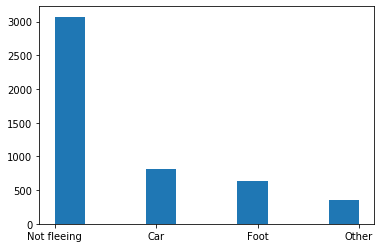

In [57]:
plt.hist(data["flee"])

Most of the victims were not fleeing

In [58]:
data["threat_level"].value_counts()

attack          3160
other           1528
undetermined     207
Name: threat_level, dtype: int64

(array([3160.,    0.,    0.,    0.,    0., 1528.,    0.,    0.,    0.,
         207.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

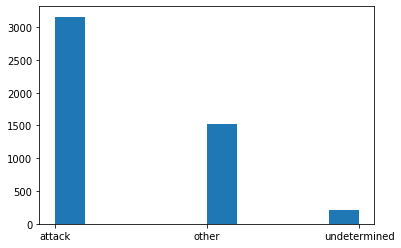

In [59]:
plt.hist(data["threat_level"])

In [60]:
data.head(2)

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-02,Tim Elliot,shot,gun,53.0,M,Asian,Shelton,True,attack,Not fleeing,False,Guns,2015,January
2015-01-02,Lewis Lee Lembke,shot,gun,47.0,M,White,Aloha,False,attack,Not fleeing,False,Guns,2015,January


In [61]:
data[(data["threat_level"]=="attack")&(data["body_camera"]==False)&(data["city"]=="Los Angeles")&(data["arms_category"]=="Guns")&(data["year"]==2015)]

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-17,Pablo Meza,shot,gun,24.0,M,Hispanic,Los Angeles,False,attack,Not fleeing,False,Guns,2015,January
2015-04-08,Roberto Rodriguez,shot,gun,39.0,M,Hispanic,Los Angeles,False,attack,Foot,False,Guns,2015,April
2015-09-15,Carlos Wilhelm,shot,gun,39.0,M,Hispanic,Los Angeles,False,attack,Not fleeing,False,Guns,2015,September


In [62]:
data.head(5)

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-02,Tim Elliot,shot,gun,53.0,M,Asian,Shelton,True,attack,Not fleeing,False,Guns,2015,January
2015-01-02,Lewis Lee Lembke,shot,gun,47.0,M,White,Aloha,False,attack,Not fleeing,False,Guns,2015,January
2015-01-03,John Paul Quintero,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,False,other,Not fleeing,False,Unarmed,2015,January
2015-01-04,Matthew Hoffman,shot,toy weapon,32.0,M,White,San Francisco,True,attack,Not fleeing,False,Other unusual objects,2015,January
2015-01-04,Michael Rodriguez,shot,nail gun,39.0,M,Hispanic,Evans,False,attack,Not fleeing,False,Piercing objects,2015,January


In [63]:
df2015=data[data["year"]==2015]

In [64]:
df2015

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-02,Tim Elliot,shot,gun,53.000000,M,Asian,Shelton,True,attack,Not fleeing,False,Guns,2015,January
2015-01-02,Lewis Lee Lembke,shot,gun,47.000000,M,White,Aloha,False,attack,Not fleeing,False,Guns,2015,January
2015-01-03,John Paul Quintero,shot and Tasered,unarmed,23.000000,M,Hispanic,Wichita,False,other,Not fleeing,False,Unarmed,2015,January
2015-01-04,Matthew Hoffman,shot,toy weapon,32.000000,M,White,San Francisco,True,attack,Not fleeing,False,Other unusual objects,2015,January
2015-01-04,Michael Rodriguez,shot,nail gun,39.000000,M,Hispanic,Evans,False,attack,Not fleeing,False,Piercing objects,2015,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,Corey Jason Achstein,shot,toy weapon,28.000000,M,White,Suffolk,False,attack,Not fleeing,True,Other unusual objects,2015,December
2015-12-29,Siolosega Velega-Nuufolau,shot,knife,50.000000,F,Other,Santa Nella,True,other,Not fleeing,False,Sharp objects,2015,December
2015-12-29,Tien Hua,shot,unknown,37.117931,M,Asian,Rosemead,False,undetermined,Not fleeing,False,Unknown,2015,December


In [65]:
df2015["gender"].value_counts()

M    924
F     41
Name: gender, dtype: int64

In [66]:
df2015["month"].value_counts()

July         100
August        91
March         91
April         83
December      82
September     80
October       78
February      77
November      76
January       75
May           69
June          63
Name: month, dtype: int64

Most of them died in the month of July... A whoooping sum of 100 shootings happened in July 2015

In [67]:
df2015["week"]=df2015.index.week

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df2015[df2015["month"]=="July"]["city"].value_counts()

Austin           3
Los Angeles      3
Oklahoma City    3
Phoenix          2
Kansas City      2
                ..
Opp              1
Meadow Vista     1
Elizabethtown    1
Seneca           1
Morristown       1
Name: city, Length: 89, dtype: int64

In [69]:
df2015["race"].value_counts()

White       497
Black       258
Hispanic    172
Other        15
Asian        14
Native        9
Name: race, dtype: int64

Most whites were killed in Oklahoma City and Los Angeles in July 2015... What happened????
<br>Let's find out more

In [70]:
df2015[df2015["month"]=="July"]["arms_category"].value_counts()

Guns                     57
Sharp objects            17
Unarmed                   9
Unknown                   6
Other unusual objects     5
Blunt instruments         4
Hand tools                1
Electrical devices        1
Name: arms_category, dtype: int64

Most of them attacked the officers with guns or other sharp objects

In [71]:
data["month"].value_counts()

January      505
March        503
February     462
April        430
May          418
July         413
June         399
August       371
October      367
November     354
December     345
September    328
Name: month, dtype: int64

In [72]:
data["city"].value_counts()

Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
                ..
Atmore           1
River Forest     1
Monon            1
Grand Rapids     1
Lake Elmo        1
Name: city, Length: 2288, dtype: int64

Overall, mose deaths happened in Los Angeles and in the month of January  from 2015-2020

In [73]:
data["day"]=data.index.day_name()

In [74]:
data.drop("day",axis="columns",inplace=True)

### HYPOTHESIS

Most of the deaths in January from 2015-2020 in Los Angeles was as a result of protests
<br>So i collected a protest dataset from  here  "https://www.kaggle.com/jpmiller/protests-against-police-violence?select=protests.csv"

In [75]:
data

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-02,Tim Elliot,shot,gun,53.0,M,Asian,Shelton,True,attack,Not fleeing,False,Guns,2015,January
2015-01-02,Lewis Lee Lembke,shot,gun,47.0,M,White,Aloha,False,attack,Not fleeing,False,Guns,2015,January
2015-01-03,John Paul Quintero,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,False,other,Not fleeing,False,Unarmed,2015,January
2015-01-04,Matthew Hoffman,shot,toy weapon,32.0,M,White,San Francisco,True,attack,Not fleeing,False,Other unusual objects,2015,January
2015-01-04,Michael Rodriguez,shot,nail gun,39.0,M,Hispanic,Evans,False,attack,Not fleeing,False,Piercing objects,2015,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-12,Rayshard Brooks,shot,Taser,27.0,M,Black,Atlanta,False,attack,Foot,True,Electrical devices,2020,June
2020-06-12,Caine Van Pelt,shot,gun,23.0,M,Black,Crown Point,False,attack,Car,False,Guns,2020,June
2020-06-13,Hannah Fizer,shot,unarmed,25.0,F,White,Sedalia,False,other,Not fleeing,False,Unarmed,2020,June


In [76]:
data[data.index.year==2015]

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-02,Tim Elliot,shot,gun,53.000000,M,Asian,Shelton,True,attack,Not fleeing,False,Guns,2015,January
2015-01-02,Lewis Lee Lembke,shot,gun,47.000000,M,White,Aloha,False,attack,Not fleeing,False,Guns,2015,January
2015-01-03,John Paul Quintero,shot and Tasered,unarmed,23.000000,M,Hispanic,Wichita,False,other,Not fleeing,False,Unarmed,2015,January
2015-01-04,Matthew Hoffman,shot,toy weapon,32.000000,M,White,San Francisco,True,attack,Not fleeing,False,Other unusual objects,2015,January
2015-01-04,Michael Rodriguez,shot,nail gun,39.000000,M,Hispanic,Evans,False,attack,Not fleeing,False,Piercing objects,2015,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,Corey Jason Achstein,shot,toy weapon,28.000000,M,White,Suffolk,False,attack,Not fleeing,True,Other unusual objects,2015,December
2015-12-29,Siolosega Velega-Nuufolau,shot,knife,50.000000,F,Other,Santa Nella,True,other,Not fleeing,False,Sharp objects,2015,December
2015-12-29,Tien Hua,shot,unknown,37.117931,M,Asian,Rosemead,False,undetermined,Not fleeing,False,Unknown,2015,December


In [77]:
data["signs_of_mental_illness"].value_counts()

False    3792
True     1103
Name: signs_of_mental_illness, dtype: int64

In [78]:
data.index.year[data["signs_of_mental_illness"]==True].value_counts()

2015    246
2016    231
2017    224
2018    189
2019    168
2020     45
Name: date, dtype: int64

In [79]:
data.index.month_name()[data["signs_of_mental_illness"]==True].value_counts()

March        131
January      120
April        106
February     102
July          93
August        88
June          87
May           86
October       77
September     76
December      73
November      64
Name: date, dtype: int64

In [80]:
data.index.year[data["gender"]=="M"].value_counts()

2015    924
2017    866
2016    866
2018    840
2019    818
2020    359
Name: date, dtype: int64

March,2015 has the most people with mental illnesses 

### FEMALE KILLINGS ANALYSIS

In [81]:
df_female=data[data["gender"]=="F"]

In [82]:
df_female

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-06,Autumn Steele,shot,unarmed,34.0,F,White,Burlington,False,other,Not fleeing,True,Unarmed,2015,January
2015-01-22,Kristiana Coignard,shot and Tasered,knife,17.0,F,White,Longview,True,other,Not fleeing,False,Sharp objects,2015,January
2015-01-26,Jessie Hernandez,shot,unknown,17.0,F,Hispanic,Denver,False,other,Not fleeing,False,Unknown,2015,January
2015-01-27,Tiffany Terry,shot,knife,39.0,F,White,Omaha,True,attack,Not fleeing,False,Sharp objects,2015,January
2015-02-03,Yuvette Henderson,shot,gun,38.0,F,Black,Emeryville,False,attack,Car,False,Guns,2015,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-05,Sandra Lee Harmon,shot,gun,56.0,F,White,Half Moon Bay,False,attack,Not fleeing,False,Guns,2020,May
2020-05-26,Tracy Drowne,shot,gun,42.0,F,White,Orlando,False,attack,Not fleeing,False,Guns,2020,May
2020-05-29,Heba Momtaz Al-Azhari,shot,knife,22.0,F,Other,Temple Terrace,True,attack,Not fleeing,False,Sharp objects,2020,May


(array([   7.,  567., 1388., 1229.,  810.,  486.,  294.,   81.,   26.,
           7.]),
 array([ 6. , 14.5, 23. , 31.5, 40. , 48.5, 57. , 65.5, 74. , 82.5, 91. ]),
 <a list of 10 Patch objects>)

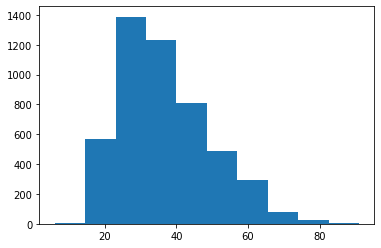

In [83]:
%matplotlib inline
plt.hist(data["age"])

(array([136.,   0.,  26.,   0.,  47.,   0.,   4.,   0.,   5.,   4.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

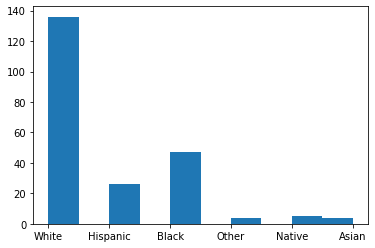

In [84]:
plt.hist(df_female["race"])

In [85]:
df_female["year"].value_counts()

2018    48
2015    41
2019    40
2017    40
2016    38
2020    15
Name: year, dtype: int64

(array([41.,  0., 38.,  0., 40.,  0., 48.,  0., 40., 15.]),
 array([2015. , 2015.5, 2016. , 2016.5, 2017. , 2017.5, 2018. , 2018.5,
        2019. , 2019.5, 2020. ]),
 <a list of 10 Patch objects>)

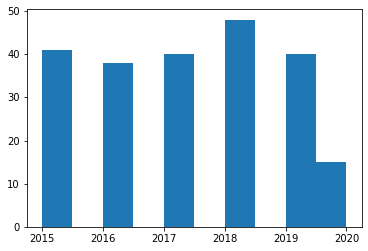

In [86]:
%matplotlib inline
plt.hist(df_female["year"])

In [87]:
df_female[df_female["year"]==2018]["month"].value_counts()

August       6
December     6
March        6
May          6
October      5
January      5
July         4
April        4
June         3
September    2
February     1
Name: month, dtype: int64

More females were killed in 2018

White females have been more subject to police shooting 

(array([156.,   0.,   0.,  48.,   0.,   0.,  11.,   0.,   0.,   7.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

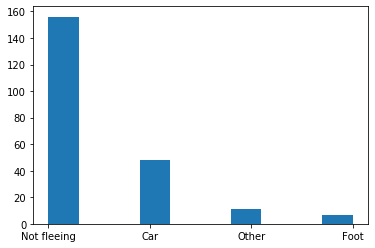

In [88]:
plt.hist(df_female["flee"])

(array([ 85.,   0.,   0.,   0.,   0., 131.,   0.,   0.,   0.,   6.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

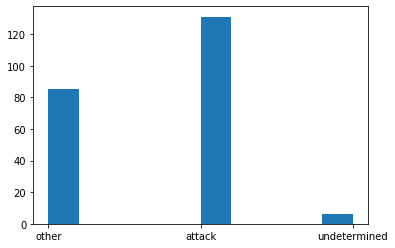

In [89]:
plt.hist(df_female["threat_level"])

### YOUNG FEMALES

In [90]:
df_femaleyoung=df_female[(df_female["age"]>1)&(df_female["age"]<20)]

In [91]:
df_femaleyoung

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-22,Kristiana Coignard,shot and Tasered,knife,17.0,F,White,Longview,True,other,Not fleeing,False,Sharp objects,2015,January
2015-01-26,Jessie Hernandez,shot,unknown,17.0,F,Hispanic,Denver,False,other,Not fleeing,False,Unknown,2015,January
2015-06-12,Shelly Haendiges,shot,toy weapon,17.0,F,White,Kokomo,True,attack,Not fleeing,False,Other unusual objects,2015,June
2016-01-11,Ciara Meyer,shot,unarmed,12.0,F,White,Penn Township,False,other,Not fleeing,False,Unarmed,2016,January
2017-02-10,Ambroshia Fagre,shot,unarmed,18.0,F,White,Vassalboro,False,other,Other,False,Unarmed,2017,February
2017-03-14,"Elena ""Ebbie"" Mondragon",shot,unarmed,16.0,F,Hispanic,Hayward,False,other,Other,False,Unarmed,2017,March
2017-04-20,Sariah Marie Lane,shot,unarmed,17.0,F,White,Glendale,False,other,Car,False,Unarmed,2017,April
2019-07-05,Hannah Williams,shot,toy weapon,17.0,F,White,Anaheim,True,attack,Not fleeing,True,Other unusual objects,2019,July


(array([3., 0., 1., 0., 0., 3., 0., 0., 0., 1.]),
 array([2015. , 2015.4, 2015.8, 2016.2, 2016.6, 2017. , 2017.4, 2017.8,
        2018.2, 2018.6, 2019. ]),
 <a list of 10 Patch objects>)

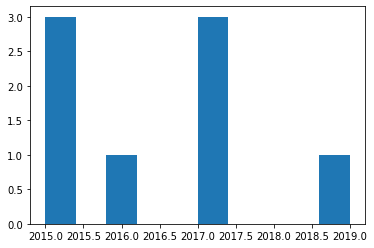

In [92]:
plt.hist(df_femaleyoung["year"])

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

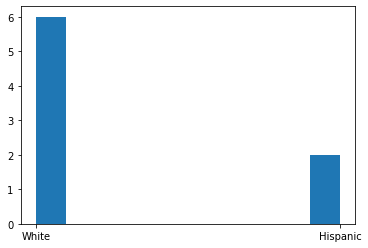

In [93]:
plt.hist(df_femaleyoung["race"])

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

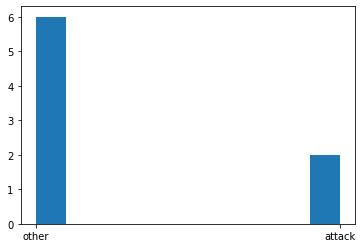

In [94]:
plt.hist(df_femaleyoung["threat_level"])

(array([5., 0., 0., 0., 0., 2., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

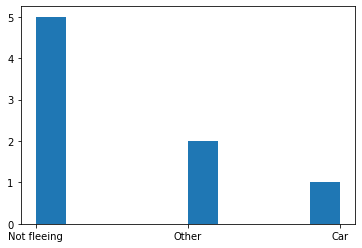

In [95]:
plt.hist(df_femaleyoung["flee"])

(array([1., 0., 0., 1., 0., 0., 2., 0., 0., 4.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

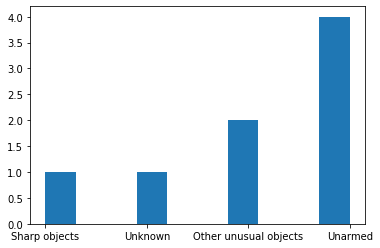

In [96]:
plt.hist(df_femaleyoung["arms_category"])

(array([3., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

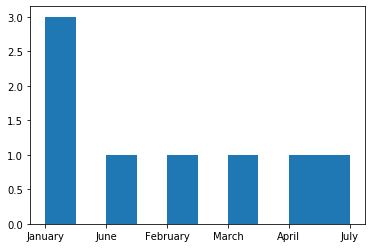

In [97]:
plt.hist(df_femaleyoung["month"])

Most of the young female killings happened in January
<ol>
    <li>Most of them were unarmed
        <li>Most of them were shot in cold blood(they were not fleeing)
            <li>Most of them were not on the defensive(they did not attack the police)
                <li>Most of them were white

### BLACKS AND WHITES IN TERMS OF VIOLENCE

In [98]:
blackorwhite=data[(data["race"]=="White")|(data["race"]=="Black")]

In [99]:
blackorwhite["race"].value_counts()

White    2476
Black    1298
Name: race, dtype: int64

In [100]:
blackorwhite[blackorwhite["race"]=="White"]["threat_level"].value_counts()

attack          1640
other            743
undetermined      93
Name: threat_level, dtype: int64

66.23% of the white gender attacked the police

In [101]:
blackorwhite[blackorwhite["race"]=="Black"]["threat_level"].value_counts()

attack          873
other           364
undetermined     61
Name: threat_level, dtype: int64

67.3% of the black gender attacked the police

In [102]:
blackorwhite[blackorwhite["race"]=="White"]["flee"].value_counts()

Not fleeing    1657
Car             418
Foot            231
Other           170
Name: flee, dtype: int64

In [103]:
blackorwhite[blackorwhite["race"]=="Black"]["flee"].value_counts()

Not fleeing    734
Foot           255
Car            218
Other           91
Name: flee, dtype: int64

66.9% of the white gender were not fleeing while 56.5% of the black gender were not fleeing

In [104]:
blackorwhite[blackorwhite["race"]=="White"]["armed"].value_counts()

gun                    1451
knife                   349
unknown                 200
unarmed                 146
toy weapon               99
                       ... 
car, knife and mace       1
baton                     1
glass shard               1
wasp spray                1
BB gun and vehicle        1
Name: armed, Length: 67, dtype: int64

58.6% of whites were armed

In [105]:
blackorwhite[blackorwhite["race"]=="Black"]["armed"].value_counts()

gun                    762
knife                  145
unarmed                123
unknown                108
vehicle                 42
toy weapon              37
machete                 11
Taser                    9
baseball bat             5
screwdriver              4
sword                    4
gun and car              3
gun and knife            3
meat cleaver             3
box cutter               3
rock                     3
baton                    3
chair                    2
BB gun                   2
pole                     2
chain                    2
pellet gun               2
metal pipe               2
guns and explosives      2
sharp object             2
hammer                   1
pepper spray             1
vehicle and machete      1
metal hand tool          1
vehicle and gun          1
flagpole                 1
crowbar                  1
lawn mower blade         1
ax                       1
piece of wood            1
motorcycle               1
straight edge razor      1
g

58.7% of the blacks were armed

From this analysis, we see that whites were more police friendly than blacks because more blacks were armed with guns, more blacks attacked the police

In [106]:
blackorwhite[blackorwhite["race"]=="Black"]

,name,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
date,,,,,,,,,,,,,,
2015-01-06,Leslie Sapp III,shot,toy weapon,47.0,M,Black,Knoxville,False,attack,Not fleeing,False,Other unusual objects,2015,January
2015-01-07,Ron Sneed,shot,gun,31.0,M,Black,Freeport,False,attack,Not fleeing,False,Guns,2015,January
2015-01-07,Hashim Hanif Ibn Abdul-Rasheed,shot,knife,41.0,M,Black,Columbus,True,other,Not fleeing,False,Sharp objects,2015,January
2015-01-07,Omarr Julian Maximillian Jackson,shot,gun,37.0,M,Black,New Orleans,False,attack,Foot,True,Guns,2015,January
2015-01-08,Artago Damon Howard,shot,unarmed,36.0,M,Black,Strong,False,attack,Not fleeing,False,Unarmed,2015,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06,Kamal Flowers,shot,gun,24.0,M,Black,New Rochelle,False,attack,Foot,False,Guns,2020,June
2020-06-09,Lewis Ruffin,shot,gun,38.0,M,Black,Orlando,False,attack,Other,False,Guns,2020,June
2020-06-11,Michael Thomas,shot,unknown,62.0,M,Black,Lancaster,False,undetermined,Not fleeing,False,Unknown,2020,June


<br><b>THANK YOU FOR VIEWING MY WORK 